<a href="https://colab.research.google.com/github/pri-Mohanty/OneCrop/blob/main/Crop_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Data Preprocessing**

In [ ]:
path_agristats = '/content/drive/MyDrive/NepalAgriStats_Cereal.csv.xlsx'
path_bajura = '/content/drive/MyDrive/bajura.csv'
path_bhojpur = '/content/drive/MyDrive/bhojpur.csv'
path_jajarkot = '/content/drive/MyDrive/jajarkot.csv'
path_kalikot = '/content/drive/MyDrive/kalikot.csv'
path_kapilbastu = '/content/drive/MyDrive/kapilbastu.csv'
path_khotang = '/content/drive/MyDrive/khotang.csv'
path_parsa = '/content/drive/MyDrive/parsa.csv'
path_pyuthan = '/content/drive/MyDrive/pyuthan.csv'
path_ramechhap = '/content/drive/MyDrive/ramechhap.csv'
path_rolpa = '/content/drive/MyDrive/rolpa.csv'
path_sindhupalchok = '/content/drive/MyDrive/sindhupalchok.csv'
path_siraha = '/content/drive/MyDrive/siraha.csv'
path_climatedata = '/content/drive/MyDrive/climate_data.csv'
path_maize2 = '/content/drive/MyDrive/additional_maize.csv'
df_maize = pd.read_excel(path_agristats)
df_weather = pd.read_csv(path_climatedata)
df_bajura = pd.read_csv(path_bajura)
df_bhojpur = pd.read_csv(path_bhojpur)
df_jajarkot = pd.read_csv(path_jajarkot)
df_kalikot = pd.read_csv(path_kalikot)
df_kapilbatsu = pd.read_csv(path_kapilbastu)
df_khotang = pd.read_csv(path_khotang)
df_parsa = pd.read_csv(path_parsa)
df_pyuthan = pd.read_csv(path_pyuthan)
df_ramechhap =pd.read_csv(path_ramechhap)
df_rolpa = pd.read_csv(path_rolpa)
df_sindhupalchok = pd.read_csv(path_sindhupalchok)
df_siraha = pd.read_csv(path_siraha)
df_maize2 = pd.read_csv(path_maize2)

In [ ]:
def data_quality_report(df):

    if isinstance(df, pd.core.frame.DataFrame):

        descriptive_statistics = df.describe(include = 'all')
        data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()
        missing_value_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).transpose()
        present_value_counts = pd.DataFrame(df.count(), columns=['Present Values']).transpose()
        data_report = pd.concat([descriptive_statistics, data_types, missing_value_counts, present_value_counts], axis=0)

        return data_report

    else:

        return None

In [ ]:
df_maize

,DISTRICT_CODE,DISTRICT_NAME,PD_P_197980,PD_P_198081,PD_P_198182,PD_P_198283,PD_P_198384,PD_P_198485,PD_P_198586,PD_P_198687,...,BW_P_201213,BW_P_201314,BW_A_201011,BW_A_201112,BW_A_201213,BW_A_201314,BW_Y_201011,BW_Y_201112,BW_Y_201213,BW_Y_201314
0,1,Taplejung,3320,3400,3570,3010,3070,3190,3800,3610,...,165,170,0,155.0,118,120,0.00,1096.77,1398,1416.67
1,2,Panchthar,7180,7000,5680,3810,14350,17440,18390,17600,...,36,36,60,60.0,56,56,700.00,700.00,643,642.86
2,3,Ilam,18700,27530,30290,15840,20040,27270,24950,21340,...,17,20,28,28.0,25,25,714.29,714.29,680,800.00
3,4,Jhapa,148020,152250,137070,126570,160820,143380,153100,147380,...,1265,1270,1300,1300.0,1265,1270,1000.00,1000.00,1000,1000.00
4,5,Sankhuwasabha,20260,18480,18480,14310,15870,21270,22240,20500,...,10,15,0,20.0,18,18,0.00,550.00,556,833.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Kailali,32670,86700,73790,58680,75600,71050,70490,72000,...,25,25,0,25.0,25,25,0.00,1000.00,1000,1000.00
71,72,Darchula,2380,2190,2300,2210,2580,2190,5180,4840,...,80,82,107,100.0,100,100,799.07,850.00,800,820.00
72,73,Baitadi,3910,6570,6600,6270,5940,5040,3780,4240,...,0,0,0,0.0,0,0,0.00,0.00,0,0.00
73,74,Dadeldhura,1710,3600,3450,8630,5760,7390,7280,6920,...,0,0,0,0.0,0,0,0.00,0.00,0,0.00


In [ ]:

df_maize2

,longitude,latitude,yield,species,moisture,year
0,-85.377384,42.407942,19.86,soybeans,13.70,2012
1,-85.377384,42.407962,11.95,soybeans,13.70,2012
2,-85.377380,42.407640,25.67,soybeans,13.70,2012
3,-85.377380,42.407659,27.34,soybeans,13.70,2012
4,-85.377380,42.407681,22.31,soybeans,13.70,2012
...,...,...,...,...,...,...
285149,-85.368070,42.410273,51.90,wheat,13.08,2001
285150,-85.368070,42.410286,53.91,wheat,13.08,2001
285151,-85.368070,42.410301,58.93,wheat,13.08,2001
285152,-85.368070,42.410314,53.91,wheat,13.08,2001


In [ ]:
for col in df_maize2.columns:
  print(col)

longitude
latitude
yield
species
moisture
year


In [ ]:
df_weather.head()

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [ ]:
final_maize = df_maize[[ 'MZ_P_200708', 'MZ_P_200809', 'MZ_P_200910', 'MZ_P_201011', 'MZ_P_201112', 'MZ_P_201213', 'MZ_P_201314','MZ_P_200708', 'MZ_A_200809', 'MZ_A_200910', 'MZ_A_201011', 'MZ_A_201112', 'MZ_A_201213', 'MZ_A_201314','MZ_Y_200708', 'MZ_Y_200809', 'MZ_Y_200910', 'MZ_Y_201011', 'MZ_Y_201112', 'MZ_Y_201213', 'MZ_Y_201314']]

In [ ]:
final_maize

,MZ_P_200708,MZ_P_200809,MZ_P_200910,MZ_P_201011,MZ_P_201112,MZ_P_201213,MZ_P_201314,MZ_P_200708,MZ_A_200809,MZ_A_200910,...,MZ_A_201112,MZ_A_201213,MZ_A_201314,MZ_Y_200708,MZ_Y_200809,MZ_Y_200910,MZ_Y_201011,MZ_Y_201112,MZ_Y_201213,MZ_Y_201314
0,28495.0,28495.0,26300,36795.000,38116.0,27450,49408,28495.0,13187,13200,...,16075,9150,16075,2161,2161,1992,2289,2371,3000,3074
1,22089.0,22133.0,21225,21232.500,21760.0,12240,29931,22089.0,14160,14150,...,12800,8000,18627,1560,1563,1500,1500,1700,1530,1607
2,57526.0,57526.0,58500,77500.000,77500.0,78385,69654,57526.0,23480,23480,...,31480,31480,28200,2450,2450,2491,2462,2462,2490,2470
3,56627.0,58600.0,58600,62310.000,72460.0,82140,95000,56627.0,22600,22600,...,24600,36185,36850,2511,2593,2593,2533,2946,2270,2578
4,28209.0,28209.0,19583,28259.175,22193.5,22226,17000,28209.0,14672,13055,...,13055,13074,12470,1923,1923,1500,1995,1700,1700,1363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,34150.0,33500.0,28500,11495.000,12000.0,12000,5755,34150.0,17000,16500,...,6000,5700,5540,2009,1971,1727,1932,2000,2105,1039
71,10970.0,10970.0,10930,19790.000,15552.4,11261,6404,10970.0,5900,5498,...,5530,5530,3558,1859,1859,1988,1987,2812,2036,1800
72,17270.0,17270.0,17100,6390.000,29000.0,18850,23417,17270.0,9500,9500,...,14500,14500,14500,1818,1818,1800,1707,2000,1300,1615
73,5949.0,6313.0,5616,6003.000,6390.0,8236,10895,5949.0,3744,3744,...,3744,3744,3744,1590,1686,1500,271,1707,2200,2910


In [ ]:
for col in df_maize2:
  print(col)

longitude
latitude
yield
species
moisture
year


In [ ]:
final_maize2 = df_maize2.drop(['latitude','longitude','moisture'], axis=1 )

In [ ]:
for col in final_maize2:
  print(col)

yield
species
year


In [ ]:
maize_data = final_maize2[final_maize2['species']=='corn']

In [ ]:
maize_data

,yield,species,year
23372,85.25,corn,2011
23373,42.60,corn,2011
23374,166.22,corn,2011
23375,152.08,corn,2011
23376,134.92,corn,2011
...,...,...,...
204864,66.30,corn,2005
204865,61.12,corn,2005
204866,55.93,corn,2005
204867,93.49,corn,2005


# **Reducing Dimensionality:**




In [ ]:
df_siraha.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,13.62,7.05,11.50,-261.17,21.39,9.40,4.21,...,2.10,4.58,0.61,3.97,2.73,4.91,0.77,4.14,26.75,86.34
1,1982,1,2,13.24,6.45,10.94,-260.94,20.48,8.27,4.03,...,2.02,4.07,0.88,3.19,2.44,4.09,0.72,3.37,26.75,86.34
2,1982,1,3,14.11,7.14,11.47,-261.21,21.00,9.06,4.15,...,1.84,3.70,0.77,2.93,2.25,3.37,1.04,2.33,26.75,86.34
3,1982,1,4,15.82,8.74,13.65,-261.11,23.01,10.97,4.64,...,1.80,3.51,0.80,2.71,2.20,3.36,1.10,2.27,26.75,86.34
4,1982,1,5,17.23,10.36,15.05,-261.31,24.87,13.02,5.31,...,2.54,5.73,0.44,5.30,3.62,6.71,0.62,6.09,26.75,86.34


In [ ]:
data_quality_report(df_siraha)

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
count,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,...,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0,13879.0
mean,2000.499676,6.523092,15.729159,22.900311,16.773157,22.653255,-262.485459,28.927127,18.262747,10.313995,...,2.587815,4.592971,0.97693,3.616084,3.36375,5.042838,1.42881,3.614072,26.75,86.34
std,10.965857,3.448783,8.800207,5.23977,6.82081,6.468883,3.260219,4.828404,5.332808,5.911907,...,0.783411,1.360661,0.582223,1.119405,1.130017,1.632267,0.99992,1.286369,0.0,0.0
min,1982.0,1.0,1.0,6.48,-1.56,5.77,-271.13,13.8,0.86,0.92,...,0.75,1.38,0.01,0.7,0.92,1.58,0.01,0.71,26.75,86.34
25%,1991.0,4.0,8.0,18.3,10.63,16.87,-265.1,25.28,13.41,4.88,...,2.03,3.65,0.53,2.85,2.56,3.92,0.66,2.74,26.75,86.34
50%,2000.0,7.0,16.0,24.33,17.62,24.39,-262.17,28.98,19.66,8.73,...,2.45,4.35,0.88,3.45,3.12,4.68,1.16,3.41,26.75,86.34
75%,2010.0,10.0,23.0,26.96,23.59,27.71,-260.07,32.4,22.99,16.66,...,2.97,5.24,1.33,4.21,3.89,5.76,1.98,4.26,26.75,86.34
max,2019.0,12.0,31.0,34.19,26.91,36.24,-252.87,42.15,28.07,21.3,...,7.85,13.55,4.34,10.16,10.84,16.12,7.3,12.34,26.75,86.34
Data Type,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Missing Values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_siraha = df_siraha[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_siraha

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,4.21,21.39,9.40,4.14
1,1982,4.03,20.48,8.27,3.37
2,1982,4.15,21.00,9.06,2.33
3,1982,4.64,23.01,10.97,2.27
4,1982,5.31,24.87,13.02,6.09
...,...,...,...,...,...
13874,2019,4.27,17.80,6.17,3.59
13875,2019,3.66,19.24,5.08,2.21
13876,2019,3.60,20.33,7.19,3.05
13877,2019,3.91,20.58,8.08,2.78


In [ ]:
df_sindhupalchok.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,3.46,-4.33,-0.33,-261.90,10.68,-0.58,2.14,...,2.09,5.12,0.30,4.81,2.20,4.59,0.37,4.22,27.91,85.74
1,1982,1,2,2.72,-5.13,-0.93,-260.56,10.79,-1.80,2.01,...,2.59,5.02,0.94,4.07,2.69,4.31,1.16,3.15,27.91,85.74
2,1982,1,3,3.30,-4.54,0.08,-259.91,10.90,-2.34,2.14,...,2.40,4.69,0.31,4.38,2.46,3.95,0.44,3.50,27.91,85.74
3,1982,1,4,4.56,-1.60,2.08,-262.13,11.38,0.36,2.93,...,1.93,5.18,0.71,4.47,2.07,4.80,0.98,3.82,27.91,85.74
4,1982,1,5,3.65,-1.32,0.88,-263.00,10.16,0.01,3.48,...,2.09,5.47,0.73,4.75,2.16,4.95,0.97,3.98,27.91,85.74


In [ ]:
final_sindhu = df_sindhupalchok[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_siraha.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,4.21,21.39,9.40,4.14
1,1982,4.03,20.48,8.27,3.37
2,1982,4.15,21.00,9.06,2.33
3,1982,4.64,23.01,10.97,2.27
4,1982,5.31,24.87,13.02,6.09


In [ ]:
df_rolpa.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,8.45,1.86,4.66,-261.66,15.73,4.24,3.36,...,2.15,4.23,1.09,3.14,2.44,4.24,1.32,2.92,28.35,82.63
1,1982,1,2,8.36,1.98,4.62,-260.38,16.42,3.65,3.48,...,2.59,4.63,1.34,3.30,3.02,4.76,1.62,3.15,28.35,82.63
2,1982,1,3,8.32,2.05,4.86,-262.15,14.84,3.84,3.54,...,2.03,3.79,0.63,3.16,2.30,3.69,0.72,2.97,28.35,82.63
3,1982,1,4,9.45,3.38,6.68,-263.03,16.16,6.04,3.91,...,1.67,2.74,0.41,2.33,1.93,2.70,0.47,2.23,28.35,82.63
4,1982,1,5,7.38,5.94,6.03,-265.47,12.43,4.75,6.59,...,1.74,2.53,0.15,2.38,2.07,2.72,0.06,2.66,28.35,82.63


In [ ]:
final_rolpa = df_rolpa[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_rolpa.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,3.36,15.73,4.24,2.92
1,1982,3.48,16.42,3.65,3.15
2,1982,3.54,14.84,3.84,2.97
3,1982,3.91,16.16,6.04,2.23
4,1982,6.59,12.43,4.75,2.66


In [ ]:
df_ramechhap.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,7.24,0.40,3.81,-262.56,14.05,3.46,3.05,...,1.81,4.16,0.81,3.35,1.90,3.59,1.03,2.57,27.51,86.18
1,1982,1,2,6.92,-0.25,3.16,-263.01,13.55,3.41,2.87,...,1.70,4.21,0.40,3.81,1.55,3.20,0.44,2.77,27.51,86.18
2,1982,1,3,7.96,0.43,3.95,-263.81,13.95,4.61,2.99,...,1.66,4.01,0.46,3.55,1.52,2.97,0.59,2.38,27.51,86.18
3,1982,1,4,8.73,2.37,5.91,-262.83,15.09,4.76,3.66,...,1.83,3.91,0.79,3.12,1.95,3.46,0.91,2.55,27.51,86.18
4,1982,1,5,8.87,3.25,6.23,-263.33,15.21,5.38,4.21,...,2.43,4.94,1.20,3.73,2.74,4.77,1.44,3.34,27.51,86.18


In [ ]:
final_ramechhap = df_ramechhap[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_ramechhap.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,3.05,14.05,3.46,2.57
1,1982,2.87,13.55,3.41,2.77
2,1982,2.99,13.95,4.61,2.38
3,1982,3.66,15.09,4.76,2.55
4,1982,4.21,15.21,5.38,3.34


In [ ]:
df_pyuthan.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,12.52,5.45,8.98,-263.21,19.12,9.17,3.85,...,1.86,5.28,0.30,4.98,2.08,5.48,0.36,5.12,28.12,82.87
1,1982,1,2,11.70,4.93,8.30,-259.86,19.65,6.36,3.85,...,2.20,4.70,0.68,4.02,2.56,4.56,0.30,4.27,28.12,82.87
2,1982,1,3,13.01,5.90,9.16,-263.16,19.49,9.51,4.03,...,1.70,3.94,0.28,3.66,1.91,3.72,0.25,3.48,28.12,82.87
3,1982,1,4,14.28,7.23,11.12,-262.95,20.69,10.48,4.39,...,1.69,3.54,0.47,3.07,1.91,3.45,0.61,2.84,28.12,82.87
4,1982,1,5,12.63,9.41,10.15,-266.32,16.33,9.50,6.90,...,2.31,3.56,1.29,2.27,3.07,4.00,1.96,2.05,28.12,82.87


In [ ]:
final_pyuthan = df_pyuthan[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_pyuthan.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,3.85,19.12,9.17,5.12
1,1982,3.85,19.65,6.36,4.27
2,1982,4.03,19.49,9.51,3.48
3,1982,4.39,20.69,10.48,2.84
4,1982,6.90,16.33,9.50,2.05


In [ ]:
df_parsa.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,14.64,8.42,13.75,-260.11,23.12,10.08,4.52,...,2.30,3.97,0.73,3.25,3.41,4.86,0.98,3.88,27.24,84.78
1,1982,1,2,14.43,8.09,12.97,-258.45,22.66,7.96,4.39,...,1.86,2.87,0.99,1.88,2.56,4.05,1.47,2.59,27.24,84.78
2,1982,1,3,15.55,8.81,14.23,-258.24,23.73,8.83,4.52,...,1.88,2.95,1.17,1.78,2.77,4.08,1.09,2.98,27.24,84.78
3,1982,1,4,17.95,10.44,16.39,-260.19,25.40,12.44,4.76,...,2.05,2.82,0.65,2.17,2.95,5.44,0.89,4.55,27.24,84.78
4,1982,1,5,18.65,12.19,17.76,-258.30,27.47,12.62,5.92,...,3.29,6.00,1.81,4.19,5.21,7.30,2.55,4.75,27.24,84.78


In [ ]:
final_parsa = df_parsa[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_parsa.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,4.52,23.12,10.08,3.88
1,1982,4.39,22.66,7.96,2.59
2,1982,4.52,23.73,8.83,2.98
3,1982,4.76,25.40,12.44,4.55
4,1982,5.92,27.47,12.62,4.75


In [ ]:
df_khotang.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,12.35,6.32,9.66,-262.74,19.31,8.90,4.27,...,1.97,4.94,0.08,4.87,2.27,4.96,0.16,4.80,27.17,86.79
1,1982,1,2,12.01,5.70,9.41,-261.77,18.73,7.35,4.03,...,1.88,4.88,0.34,4.54,2.02,4.45,0.41,4.03,27.17,86.79
2,1982,1,3,12.80,6.24,10.02,-261.51,19.51,7.87,4.15,...,1.66,4.24,0.15,4.09,1.81,3.76,0.16,3.59,27.17,86.79
3,1982,1,4,14.73,8.08,12.08,-262.60,21.30,10.73,4.70,...,1.74,4.51,0.22,4.30,1.95,4.31,0.17,4.13,27.17,86.79
4,1982,1,5,15.12,8.93,12.83,-261.00,22.44,10.28,5.19,...,1.91,5.50,0.11,5.39,2.31,5.91,0.13,5.77,27.17,86.79


In [ ]:
final_khotang = df_khotang[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_khotang.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,4.27,19.31,8.90,4.80
1,1982,4.03,18.73,7.35,4.03
2,1982,4.15,19.51,7.87,3.59
3,1982,4.70,21.30,10.73,4.13
4,1982,5.19,22.44,10.28,5.77


In [ ]:
df_kapilbatsu.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,14.99,8.44,13.66,-260.21,23.22,10.27,4.39,...,2.36,4.74,0.36,4.38,3.40,5.67,0.23,5.45,27.63,82.98
1,1982,1,2,13.50,7.83,11.75,-258.53,21.32,6.70,4.52,...,2.04,3.12,0.27,2.86,2.67,4.04,0.30,3.73,27.63,82.98
2,1982,1,3,14.99,8.72,13.05,-258.40,22.29,7.54,4.64,...,1.95,3.42,0.90,2.52,2.65,5.08,1.22,3.87,27.63,82.98
3,1982,1,4,17.58,10.36,15.78,-258.63,25.31,10.79,4.82,...,2.17,2.95,0.23,2.71,3.05,4.95,0.29,4.66,27.63,82.98
4,1982,1,5,18.37,13.17,17.18,-260.87,25.98,13.69,6.96,...,2.77,4.84,0.58,4.26,4.48,6.98,0.86,6.12,27.63,82.98


In [ ]:
final_kapilbatsu = df_kapilbatsu[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_kapilbatsu.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,4.39,23.22,10.27,5.45
1,1982,4.52,21.32,6.70,3.73
2,1982,4.64,22.29,7.54,3.87
3,1982,4.82,25.31,10.79,4.66
4,1982,6.96,25.98,13.69,6.12


In [ ]:
df_kalikot.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,6.06,-0.53,2.15,-261.77,13.22,1.83,2.93,...,1.99,3.72,0.80,2.91,2.16,3.48,0.95,2.52,29.2,81.75
1,1982,1,2,5.82,-0.24,2.50,-259.79,14.16,0.80,3.11,...,2.30,3.77,0.89,2.88,2.52,3.59,1.12,2.48,29.2,81.75
2,1982,1,3,6.32,0.08,3.19,-261.13,13.36,1.35,3.17,...,1.95,3.57,0.04,3.52,2.09,3.23,0.09,3.16,29.2,81.75
3,1982,1,4,7.00,1.90,4.49,-263.02,13.37,3.25,3.97,...,1.60,4.12,0.37,3.75,1.73,3.91,0.50,3.41,29.2,81.75
4,1982,1,5,5.30,3.70,4.51,-263.36,11.44,1.65,5.74,...,1.91,3.92,0.95,2.97,2.06,3.62,0.96,2.65,29.2,81.75


In [ ]:
final_kalikot = df_kalikot[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_kalikot.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,2.93,13.22,1.83,2.52
1,1982,3.11,14.16,0.80,2.48
2,1982,3.17,13.36,1.35,3.16
3,1982,3.97,13.37,3.25,3.41
4,1982,5.74,11.44,1.65,2.65


In [ ]:
df_jajarkot.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,6.06,-0.53,2.15,-261.77,13.22,1.83,2.93,...,1.99,3.72,0.80,2.91,2.16,3.48,0.95,2.52,28.87,82.17
1,1982,1,2,5.82,-0.24,2.50,-259.79,14.16,0.80,3.11,...,2.30,3.77,0.89,2.88,2.52,3.59,1.12,2.48,28.87,82.17
2,1982,1,3,6.32,0.08,3.19,-261.13,13.36,1.35,3.17,...,1.95,3.57,0.04,3.52,2.09,3.23,0.09,3.16,28.87,82.17
3,1982,1,4,7.00,1.90,4.49,-263.02,13.37,3.25,3.97,...,1.60,4.12,0.37,3.75,1.73,3.91,0.50,3.41,28.87,82.17
4,1982,1,5,5.30,3.70,4.51,-263.36,11.44,1.65,5.74,...,1.91,3.92,0.95,2.97,2.06,3.62,0.96,2.65,28.87,82.17


In [ ]:
final_jajarkot = df_jajarkot[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_jajarkot.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,2.93,13.22,1.83,2.52
1,1982,3.11,14.16,0.80,2.48
2,1982,3.17,13.36,1.35,3.16
3,1982,3.97,13.37,3.25,3.41
4,1982,5.74,11.44,1.65,2.65


In [ ]:
df_bhojpur.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,12.35,6.32,9.66,-262.74,19.31,8.90,4.27,...,1.97,4.94,0.08,4.87,2.27,4.96,0.16,4.80,27.18,87.07
1,1982,1,2,12.01,5.70,9.41,-261.77,18.73,7.35,4.03,...,1.88,4.88,0.34,4.54,2.02,4.45,0.41,4.03,27.18,87.07
2,1982,1,3,12.80,6.24,10.02,-261.51,19.51,7.87,4.15,...,1.66,4.24,0.15,4.09,1.81,3.76,0.16,3.59,27.18,87.07
3,1982,1,4,14.73,8.08,12.08,-262.60,21.30,10.73,4.70,...,1.74,4.51,0.22,4.30,1.95,4.31,0.17,4.13,27.18,87.07
4,1982,1,5,15.12,8.93,12.83,-261.00,22.44,10.28,5.19,...,1.91,5.50,0.11,5.39,2.31,5.91,0.13,5.77,27.18,87.07


In [ ]:
final_bhojpur = df_bhojpur[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_bhojpur.head()

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,4.27,19.31,8.90,4.80
1,1982,4.03,18.73,7.35,4.03
2,1982,4.15,19.51,7.87,3.59
3,1982,4.70,21.30,10.73,4.13
4,1982,5.19,22.44,10.28,5.77


In [ ]:
df_bajura.head()

,YEAR,MO,DY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,LAT,LON
0,1982,1,1,5.05,-2.96,1.44,-258.77,13.90,-0.48,2.14,...,2.52,4.57,1.06,3.51,2.67,4.24,1.27,2.98,29.56,81.56
1,1982,1,2,4.49,-3.01,1.48,-257.26,13.61,-2.28,2.20,...,2.70,4.66,0.83,3.84,2.83,4.23,0.97,3.27,29.56,81.56
2,1982,1,3,5.31,-2.78,2.68,-258.01,13.91,-1.22,2.20,...,2.29,3.96,0.62,3.35,2.41,3.48,0.77,2.72,29.56,81.56
3,1982,1,4,4.91,-0.17,3.98,-262.02,11.83,0.71,3.66,...,2.05,5.69,0.16,5.52,2.20,5.52,0.24,5.27,29.56,81.56
4,1982,1,5,3.63,0.93,3.19,-262.19,10.30,-0.67,4.52,...,2.23,4.48,0.50,3.98,2.38,3.97,0.60,3.37,29.56,81.56


In [ ]:
final_bajura = df_bajura[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]
final_bajura

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1982,2.14,13.90,-0.48,2.98
1,1982,2.20,13.61,-2.28,3.27
2,1982,2.20,13.91,-1.22,2.72
3,1982,3.66,11.83,0.71,5.27
4,1982,4.52,10.30,-0.67,3.37
...,...,...,...,...,...
13874,2019,1.65,8.58,-9.34,6.88
13875,2019,1.89,10.76,-7.20,7.15
13876,2019,2.26,10.51,-4.99,2.98
13877,2019,2.38,9.23,-5.24,2.98



# **Random Sampling:**

In [ ]:
final_bajura = final_bajura.sample(frac=0.3)


In [ ]:
final_bajura

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
901,1984,10.80,23.29,11.87,4.37
1193,1985,4.58,20.98,5.73,6.08
1860,1987,2.44,10.33,-2.94,4.55
8573,2005,11.90,25.44,14.87,4.82
5316,1996,13.55,22.12,15.41,4.43
...,...,...,...,...,...
2219,1988,2.69,11.77,-3.95,3.35
3772,1992,5.13,22.73,7.97,5.80
3461,1991,7.02,26.99,11.83,4.53
12413,2015,2.75,16.06,2.76,3.67


In [ ]:
final_bhojpur = final_bhojpur.sample(frac=0.3)
final_bhojpur

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
9,1982,4.33,20.65,10.44,3.03
4148,1993,7.57,33.12,19.30,7.04
8928,2006,12.39,32.81,21.98,6.36
3615,1991,4.82,22.66,12.63,3.66
11719,2014,3.66,23.04,10.58,4.11
...,...,...,...,...,...
11009,2012,5.80,25.25,11.86,5.95
11664,2013,7.75,21.13,13.22,2.74
7354,2002,3.72,25.48,13.99,4.98
12643,2016,18.86,28.49,21.93,1.99


In [ ]:
final_jajarkot = final_jajarkot.sample(frac=0.3)
final_jajarkot

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
2533,1988,3.17,12.44,2.58,3.01
10271,2010,2.93,12.34,-0.32,3.79
3127,1990,15.20,21.37,15.45,3.21
6139,1998,9.40,20.30,10.38,3.88
12917,2017,7.32,26.64,12.38,6.12
...,...,...,...,...,...
12872,2017,6.41,23.51,9.30,4.31
10522,2010,7.75,16.19,5.21,2.18
6706,2000,8.91,28.10,13.91,3.85
2960,1990,5.25,13.60,0.51,2.80


In [ ]:
final_kalikot= final_kalikot.sample(frac=0.3)
final_kalikot

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
5038,1995,7.14,19.58,7.04,4.02
10724,2011,7.08,25.93,11.25,4.73
6248,1999,4.03,16.66,2.41,4.45
1332,1985,14.65,21.25,14.49,4.69
8365,2004,5.98,11.49,2.87,2.81
...,...,...,...,...,...
2629,1989,4.03,13.55,1.21,3.89
13415,2018,12.88,19.93,12.90,3.17
10524,2010,6.53,16.65,5.28,3.02
6652,2000,2.38,17.40,0.32,4.91


In [ ]:
final_kapilbatsu=final_kapilbatsu.sample(frac=0.3)
final_kapilbatsu

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
543,1983,18.98,32.75,27.78,8.47
4183,1993,14.65,40.56,29.56,3.63
1459,1985,5.55,22.40,8.20,7.12
5624,1997,6.84,40.42,26.91,5.27
4764,1995,5.19,22.15,12.64,7.12
...,...,...,...,...,...
2335,1988,5.43,44.75,25.69,6.84
761,1984,3.54,26.54,8.79,7.88
5713,1997,17.82,30.88,25.66,5.19
389,1983,3.23,25.37,11.03,3.76


In [ ]:
final_khotang=final_khotang.sample(frac=0.3)
final_khotang

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
5503,1997,2.99,18.28,5.07,5.09
868,1984,6.71,36.84,21.64,4.65
12120,2015,4.15,29.33,14.47,5.88
1242,1985,11.96,33.73,21.38,3.31
7175,2001,16.85,25.55,21.97,4.46
...,...,...,...,...,...
9946,2009,4.94,29.71,16.34,6.81
2330,1988,13.79,30.63,20.97,1.83
4818,1995,2.62,27.23,12.08,7.93
4699,1994,5.37,25.77,14.17,3.73


In [ ]:
final_parsa = final_parsa.sample(frac=0.3)

In [ ]:
final_parsa

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
1587,1986,11.11,37.60,23.92,2.35
13112,2017,6.53,26.55,12.62,3.25
12173,2015,10.80,38.20,23.75,3.96
4344,1993,4.70,29.51,14.40,2.73
4777,1995,3.54,26.74,10.93,3.61
...,...,...,...,...,...
9901,2009,5.68,27.75,13.23,2.65
2024,1987,20.69,32.01,26.73,3.64
9736,2008,21.18,29.05,25.36,3.07
11755,2014,5.86,29.54,14.39,4.10


In [ ]:
final_pyuthan=final_pyuthan.sample(frac=0.3)
final_pyuthan

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
11792,2014,6.84,30.48,15.90,4.43
12472,2016,2.99,22.43,11.06,3.79
2941,1990,4.21,24.44,10.75,4.08
7459,2002,8.48,35.11,22.09,5.55
1115,1985,5.68,16.83,6.38,3.28
...,...,...,...,...,...
11854,2014,14.83,34.85,23.90,4.58
9869,2009,5.92,16.94,8.40,1.53
6517,1999,5.86,26.31,14.68,4.84
2684,1989,1.28,35.76,18.51,7.15


In [ ]:
final_ramechhap=final_ramechhap.sample(frac=0.3)
final_ramechhap

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
4925,1995,14.10,25.83,15.97,3.87
2637,1989,4.64,22.40,7.48,3.68
119,1982,5.43,23.03,9.99,4.30
6994,2001,3.42,15.61,3.79,4.25
8113,2004,5.92,21.02,9.75,4.45
...,...,...,...,...,...
11613,2013,12.76,17.58,12.53,3.02
535,1983,8.24,27.80,15.11,3.19
5174,1996,2.87,18.76,6.46,3.30
12772,2016,4.58,14.88,7.65,2.81


In [ ]:
final_rolpa=final_rolpa.sample(frac=0.3)
final_rolpa

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
329,1982,3.91,13.48,2.64,1.96
12339,2015,10.86,19.44,12.46,2.73
13200,2018,3.91,17.61,4.75,3.40
609,1983,15.38,22.75,16.79,3.05
1135,1985,2.20,14.97,1.13,4.04
...,...,...,...,...,...
11208,2012,13.92,24.11,15.18,3.20
3495,1991,15.99,28.11,18.34,5.03
4551,1994,14.65,27.86,17.45,4.34
5970,1998,10.01,26.15,14.34,4.06


In [ ]:
final_sindhu = final_sindhu.sample(frac=0.3)
final_sindhu

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
1417,1985,3.54,10.71,-0.39,3.02
12998,2017,14.65,18.29,12.69,4.78
12774,2016,3.78,12.57,3.16,2.46
5563,1997,1.46,13.17,-1.49,4.69
8801,2006,2.26,13.73,-3.53,4.55
...,...,...,...,...,...
12315,2015,12.51,15.44,11.50,2.87
2892,1989,1.65,10.07,-1.46,3.13
12457,2016,3.97,8.51,-1.48,4.02
11906,2014,13.92,17.37,12.71,1.41


In [ ]:
final_siraha = final_siraha.sample(frac=0.3)
final_siraha

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
2614,1989,3.78,29.76,14.17,5.55
10882,2011,14.83,27.18,20.09,2.84
11668,2013,7.32,21.19,11.02,3.43
11438,2013,9.03,33.46,20.12,4.84
11226,2012,16.11,28.15,19.90,3.52
...,...,...,...,...,...
1182,1985,5.86,34.10,18.90,4.31
10858,2011,17.40,25.48,21.34,2.50
3813,1992,12.94,35.23,23.76,2.21
946,1984,18.92,29.39,22.07,4.38


# **Concatenation of the datasets**

In [ ]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

In [ ]:
df_weather

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883123,2019-12-27,Udayapur,26.9,86.5,0.00,95.52,4.72,54.60,11.13,2.17,...,11.01,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20
883124,2019-12-28,Udayapur,26.9,86.5,0.00,95.73,4.23,50.90,10.56,0.60,...,13.18,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07
883125,2019-12-29,Udayapur,26.9,86.5,0.00,95.76,4.08,46.09,11.51,0.18,...,12.30,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18
883126,2019-12-30,Udayapur,26.9,86.5,0.00,95.84,4.44,47.07,12.47,1.32,...,12.20,9.76,1.44,1.94,0.27,1.67,2.00,3.22,0.15,3.06


In [ ]:
df_weather['YEAR'] = df_weather['DATE'].dt.year

In [ ]:
df_weather

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,YEAR
0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39,1981
1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34,1981
2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15,1981
3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12,1981
4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883123,2019-12-27,Udayapur,26.9,86.5,0.00,95.52,4.72,54.60,11.13,2.17,...,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20,2019
883124,2019-12-28,Udayapur,26.9,86.5,0.00,95.73,4.23,50.90,10.56,0.60,...,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07,2019
883125,2019-12-29,Udayapur,26.9,86.5,0.00,95.76,4.08,46.09,11.51,0.18,...,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18,2019
883126,2019-12-30,Udayapur,26.9,86.5,0.00,95.84,4.44,47.07,12.47,1.32,...,9.76,1.44,1.94,0.27,1.67,2.00,3.22,0.15,3.06,2019


In [ ]:
final_weather = df_weather[["YEAR", "QV2M", "T2M_MAX", "T2M_MIN", "WS50M_RANGE"]]

In [ ]:
final_weather

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1981,4.81,20.82,9.94,3.39
1,1981,4.94,20.70,9.54,2.34
2,1981,5.22,20.71,10.78,3.15
3,1981,5.36,20.43,10.02,3.12
4,1981,5.84,19.62,9.08,3.68
...,...,...,...,...,...
883123,2019,4.72,17.98,6.97,3.20
883124,2019,4.23,18.52,5.34,3.07
883125,2019,4.08,19.34,7.04,3.18
883126,2019,4.44,20.03,7.83,3.06


In [ ]:
combined_climatedata = pd.concat([final_weather, final_bajura, final_bhojpur, final_jajarkot, final_kalikot, final_kapilbatsu, final_khotang, final_parsa, final_pyuthan, final_ramechhap, final_rolpa, final_sindhu, final_siraha], axis=0)

In [ ]:
combined_climatedata

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
0,1981,4.81,20.82,9.94,3.39
1,1981,4.94,20.70,9.54,2.34
2,1981,5.22,20.71,10.78,3.15
3,1981,5.36,20.43,10.02,3.12
4,1981,5.84,19.62,9.08,3.68
...,...,...,...,...,...
1182,1985,5.86,34.10,18.90,4.31
10858,2011,17.40,25.48,21.34,2.50
3813,1992,12.94,35.23,23.76,2.21
946,1984,18.92,29.39,22.07,4.38


In [ ]:
data_quality_report(combined_climatedata)

,YEAR,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE
count,933096.0,933096.0,933096.0,933096.0,933096.0
mean,2000.026826,8.509421,21.95336,11.156422,3.727127
std,11.240679,5.429023,8.792841,9.291652,1.28493
min,1981.0,0.27,-16.94,-37.24,0.45
25%,1990.0,3.92,16.66,5.49,2.83
50%,2000.0,6.76,22.56,12.05,3.53
75%,2010.0,13.2,27.98,17.95,4.4
max,2019.0,23.56,47.34,32.87,18.5
Data Type,int64,float64,float64,float64,float64
Missing Values,0,0,0,0,0


In [ ]:
final_maize2

,yield,species,year
0,19.86,soybeans,2012
1,11.95,soybeans,2012
2,25.67,soybeans,2012
3,27.34,soybeans,2012
4,22.31,soybeans,2012
...,...,...,...
285149,51.90,wheat,2001
285150,53.91,wheat,2001
285151,58.93,wheat,2001
285152,53.91,wheat,2001


In [ ]:
final_dataset = combined_climatedata.combine_first(maize_data)

In [ ]:
final_dataset

,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE,YEAR,species,year,yield
0,4.81,20.82,9.94,3.39,1981,NaN,NaN,NaN
0,4.27,19.31,8.90,4.80,1982,NaN,NaN,NaN
0,2.93,13.22,1.83,2.52,1982,NaN,NaN,NaN
0,3.85,19.12,9.17,5.12,1982,NaN,NaN,NaN
1,4.94,20.70,9.54,2.34,1981,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
883123,4.72,17.98,6.97,3.20,2019,NaN,NaN,NaN
883124,4.23,18.52,5.34,3.07,2019,NaN,NaN,NaN
883125,4.08,19.34,7.04,3.18,2019,NaN,NaN,NaN
883126,4.44,20.03,7.83,3.06,2019,NaN,NaN,NaN


In [ ]:
final_dataset.dropna(inplace=True)

In [ ]:
final_dataset

,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE,YEAR,species,year,yield
23372,3.96,11.29,3.22,2.31,2005,corn,2011.0,85.25
23373,4.07,11.74,2.69,2.13,2005,corn,2011.0,42.60
23374,3.38,13.48,3.80,1.70,2005,corn,2011.0,166.22
23375,2.97,15.03,4.44,2.14,2006,corn,2011.0,152.08
23376,2.81,15.33,4.92,1.41,2006,corn,2011.0,134.92
...,...,...,...,...,...,...,...,...
204864,3.91,15.70,4.67,3.48,1995,corn,2005.0,66.30
204865,3.44,15.72,5.21,3.35,1995,corn,2005.0,61.12
204866,3.29,15.51,3.80,3.28,1995,corn,2005.0,55.93
204867,3.23,15.38,4.61,3.16,1995,corn,2005.0,93.49


In [ ]:
data_quality_report(final_dataset)

,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE,YEAR,species,year,yield
count,84140.0,84140.0,84140.0,84140.0,84140.0,84140,84140.0,84140.0
unique,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,corn,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,84140,NaN,NaN
mean,7.76963,20.133983,9.159107,3.691822,1999.899964,NaN,2008.318327,119.937765
std,5.000803,7.664221,8.345619,1.128068,11.645383,NaN,2.526871,251.157931
min,0.64,-6.52,-23.51,0.6,1981.0,NaN,2005.0,0.0
25%,3.6,15.43,3.67,2.89,1990.0,NaN,2005.0,72.99
50%,5.99,20.4,9.62,3.56,2000.0,NaN,2008.0,108.78
75%,11.89,25.24,15.5425,4.35,2010.0,NaN,2011.0,156.08


**Data visualisations**

In [ ]:
corr = final_dataset.corr()
corr

<ipython-input-73-2877a20ad4cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_dataset.corr()


,QV2M,T2M_MAX,T2M_MIN,WS50M_RANGE,YEAR,year,yield
QV2M,1.000000,0.509683,0.754477,-0.234366,0.060026,-0.157003,0.005312
T2M_MAX,0.509683,1.000000,0.919723,-0.019243,-0.147273,-0.338005,-0.062897
T2M_MIN,0.754477,0.919723,1.000000,-0.173341,-0.070833,-0.356444,-0.048148
WS50M_RANGE,-0.234366,-0.019243,-0.173341,1.000000,-0.060004,0.184106,0.015301
YEAR,0.060026,-0.147273,-0.070833,-0.060004,1.000000,0.049939,0.037995
year,-0.157003,-0.338005,-0.356444,0.184106,0.049939,1.000000,0.067269
yield,0.005312,-0.062897,-0.048148,0.015301,0.037995,0.067269,1.000000


<Axes: >

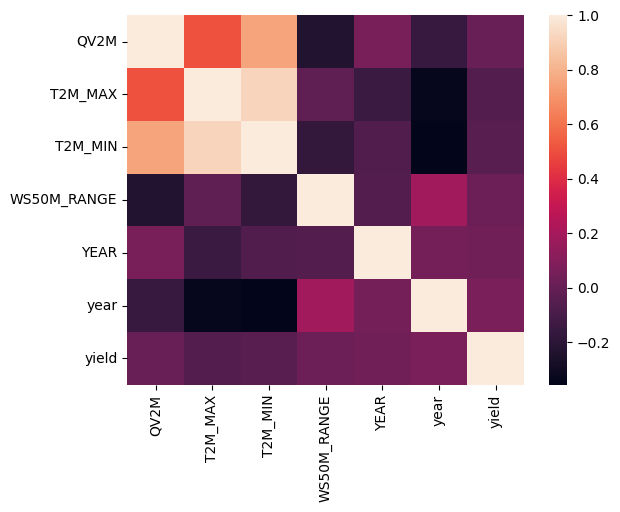

In [ ]:
sns.heatmap(corr)

<Axes: xlabel='T2M_MAX', ylabel='yield'>

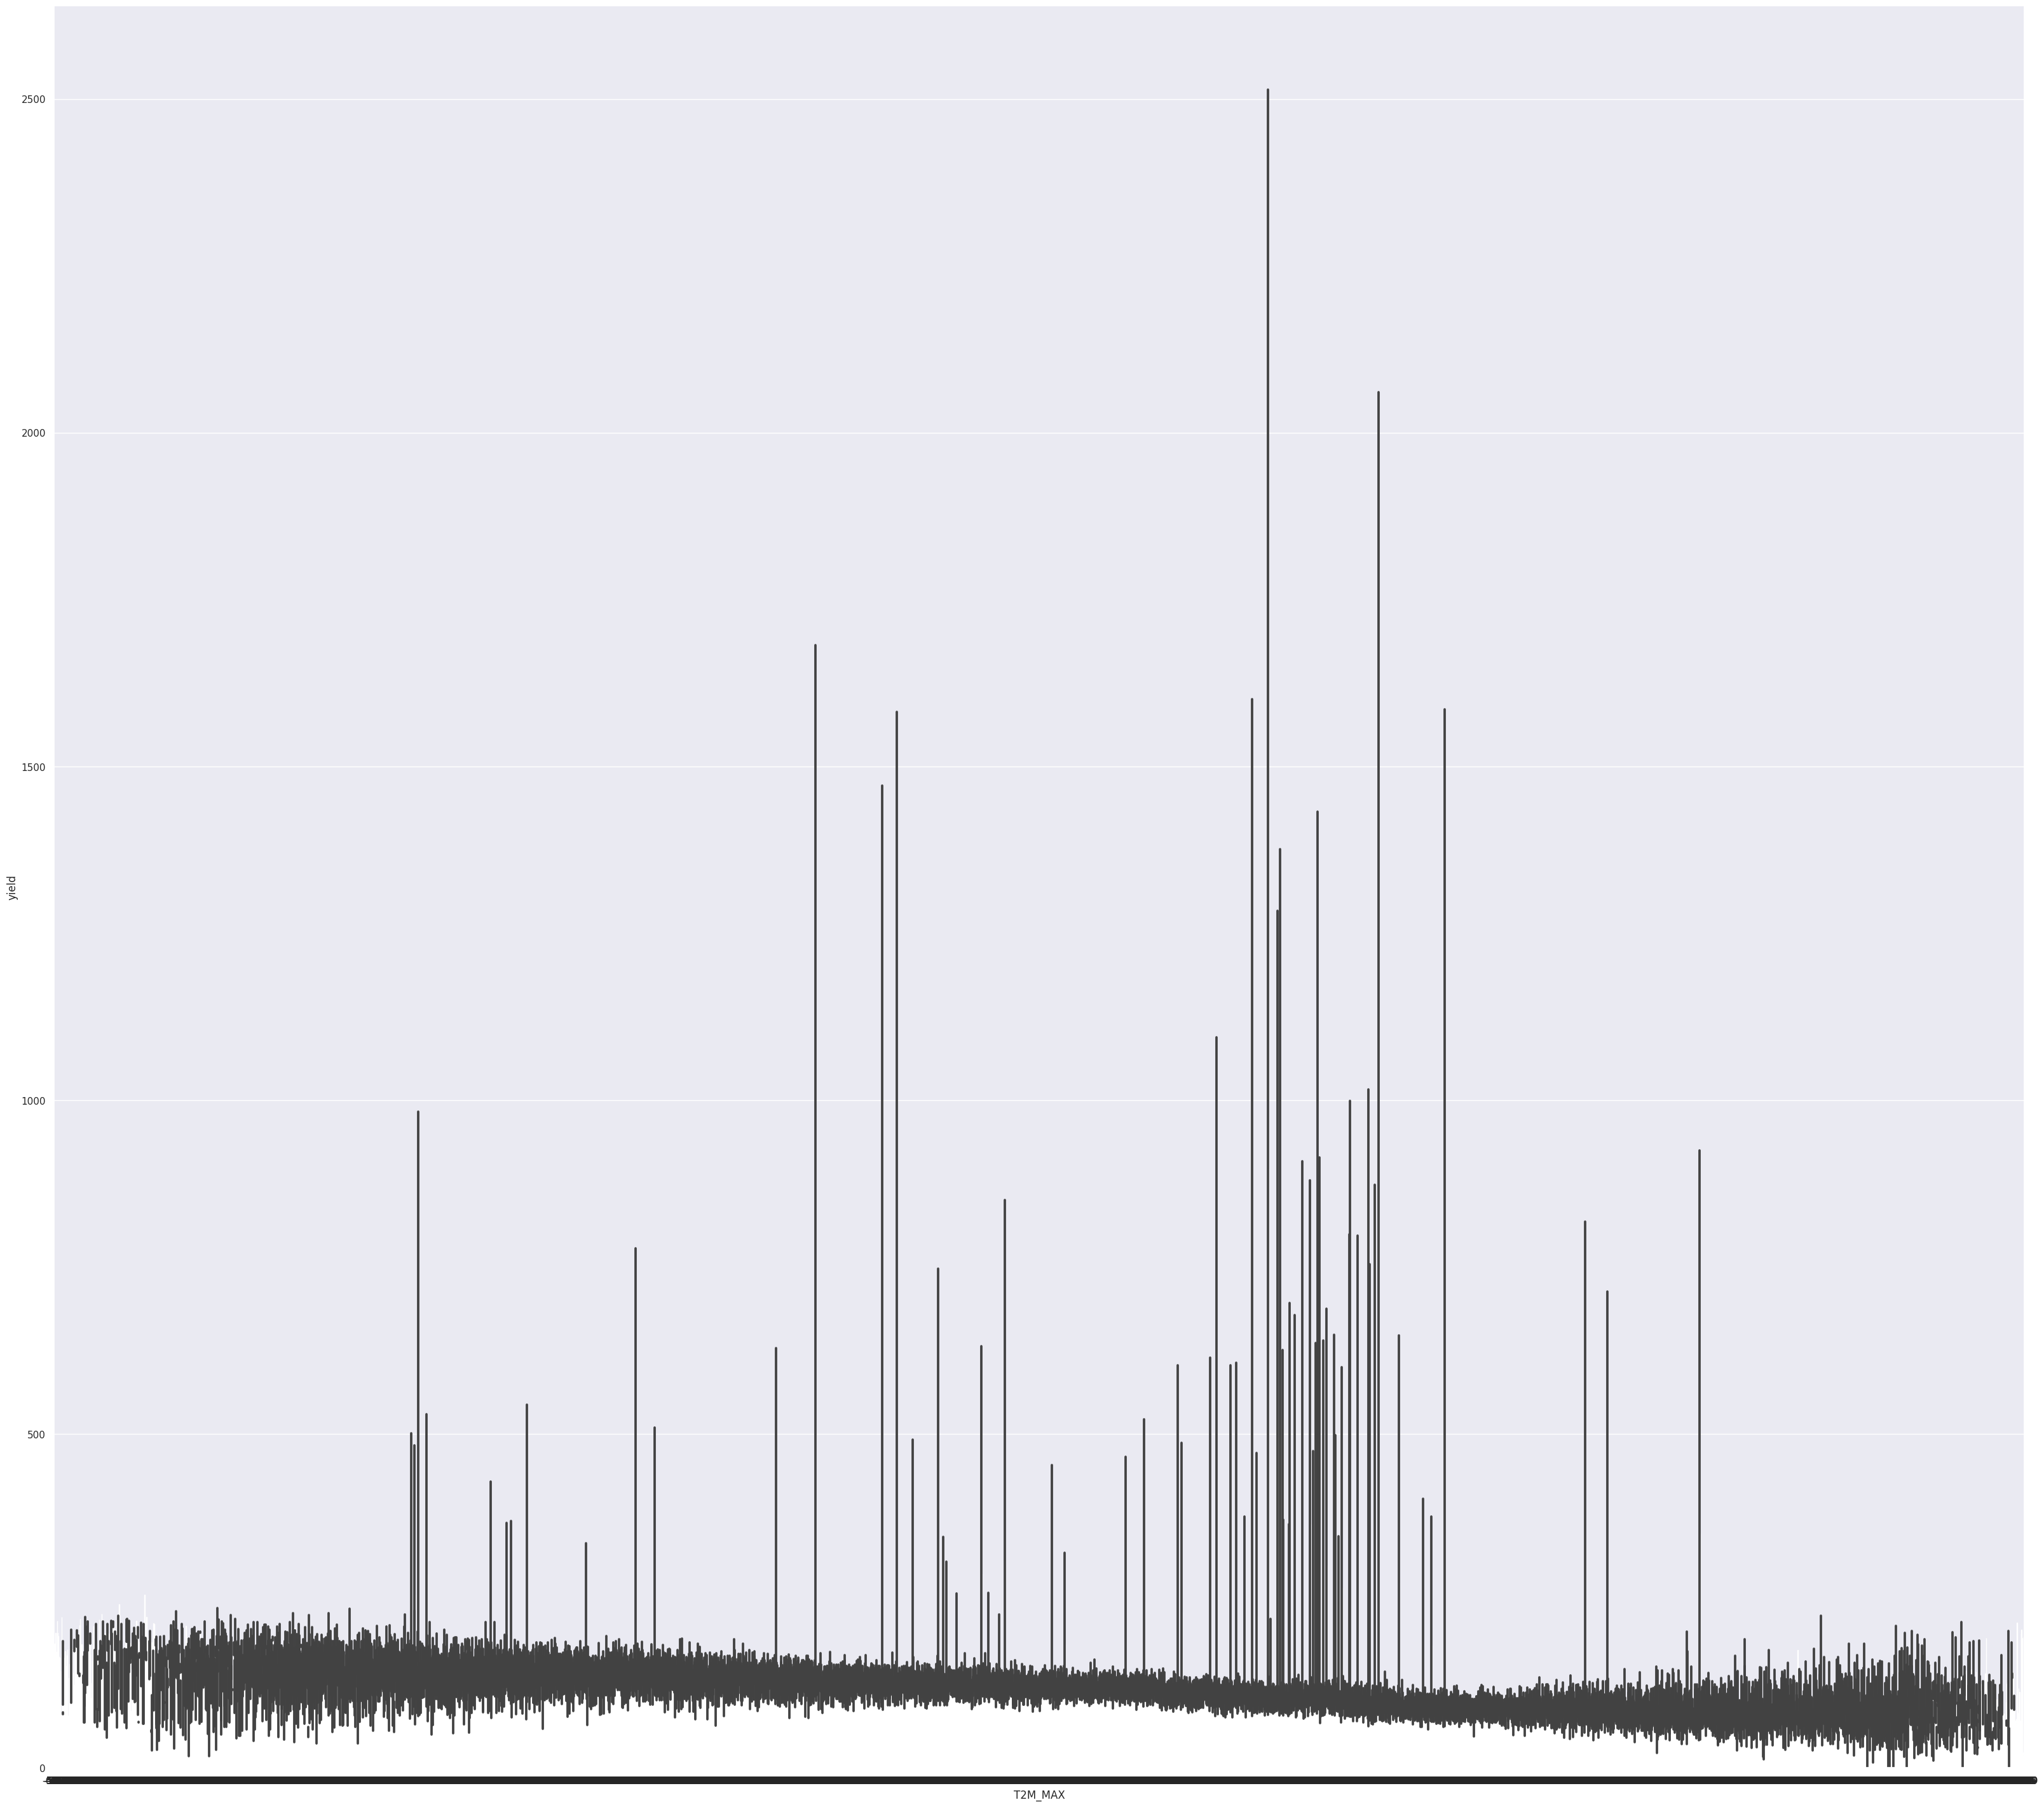

In [ ]:
sns.set(rc={"figure.figsize":(40,36)})
sns.barplot(x="T2M_MAX", y="yield", data=final_dataset)

<Axes: xlabel='T2M_MAX', ylabel='yield'>

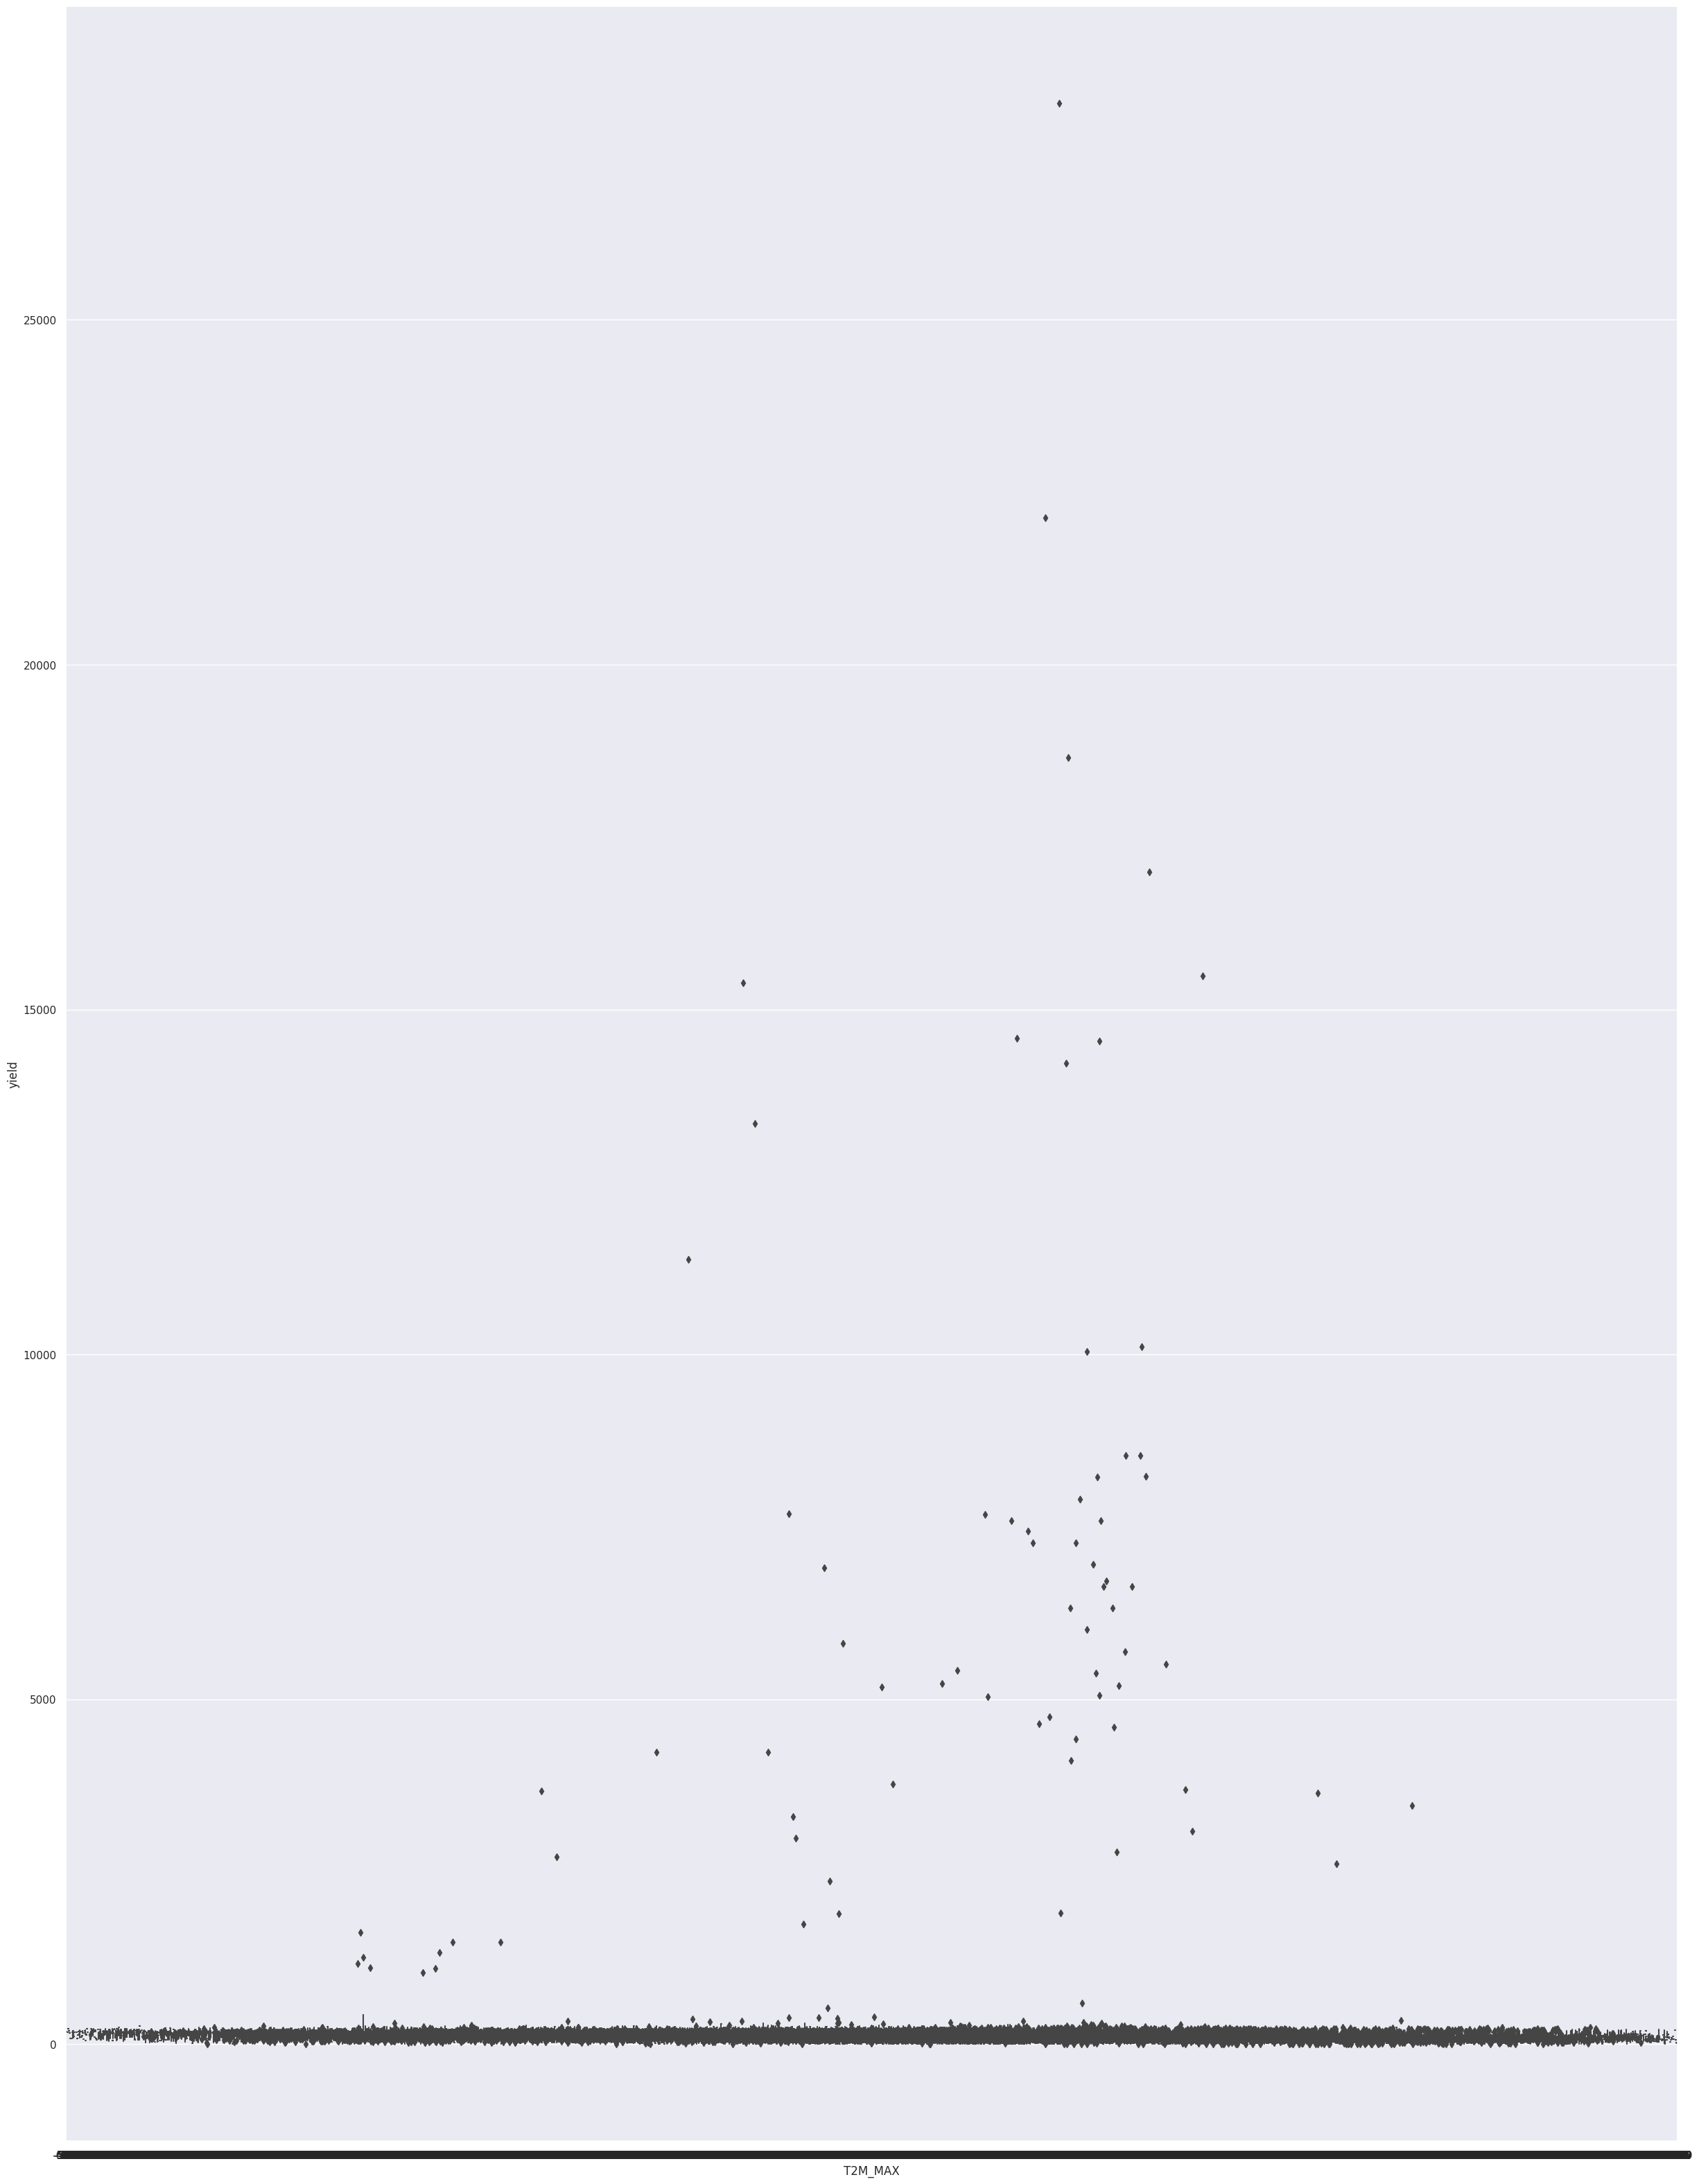

In [ ]:
sns.set(rc={"figure.figsize":(30,40)})
sns.boxplot(x="T2M_MAX", y="yield", data=final_dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X = final_dataset.drop(['yield', "year", 'YEAR','species' ], axis=1)
y = final_dataset[["yield"]]

<Axes: ylabel='Density'>

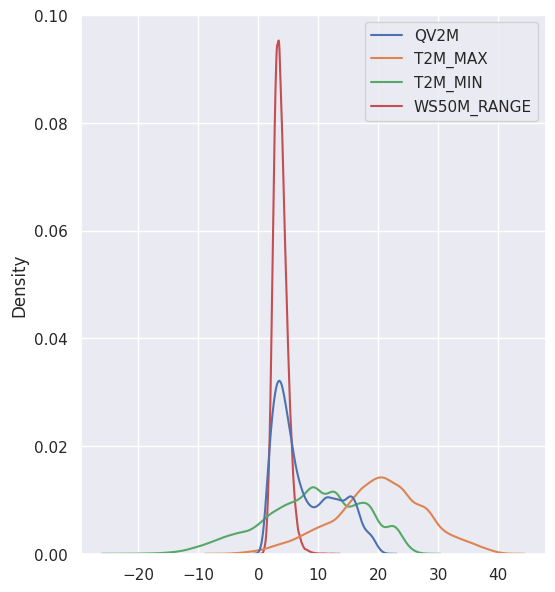

In [ ]:
sns.set(rc={"figure.figsize":(6,7)})
sns.kdeplot(data=X)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

<Axes: ylabel='Density'>

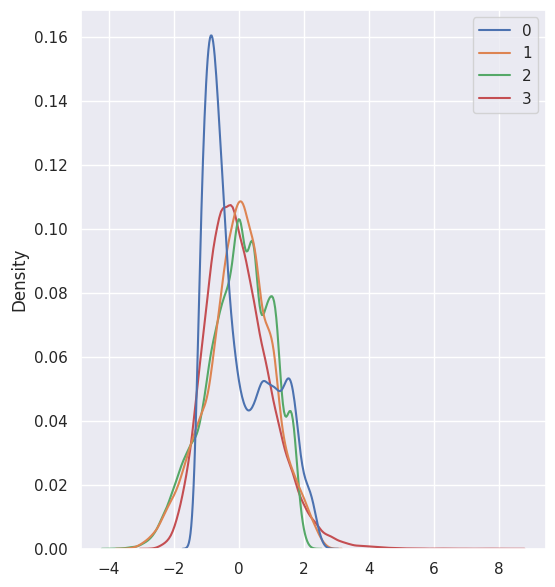

In [ ]:
scaled_X = scaler.transform(X)
sns.kdeplot(data=scaled_X)

<Axes: ylabel='Density'>

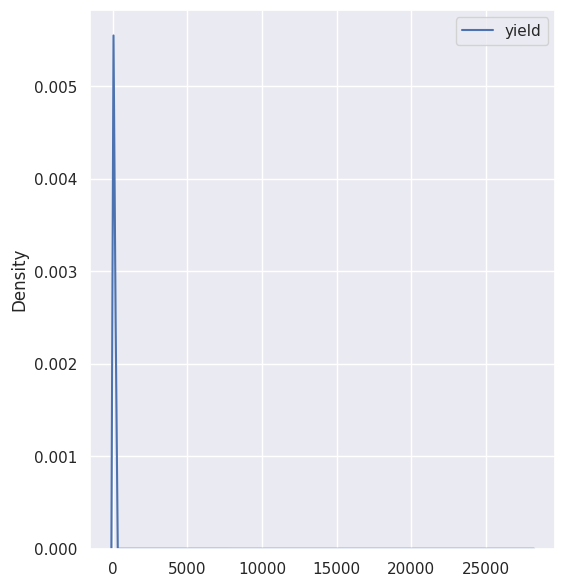

In [ ]:
sns.kdeplot(data=y)

<Axes: ylabel='Density'>

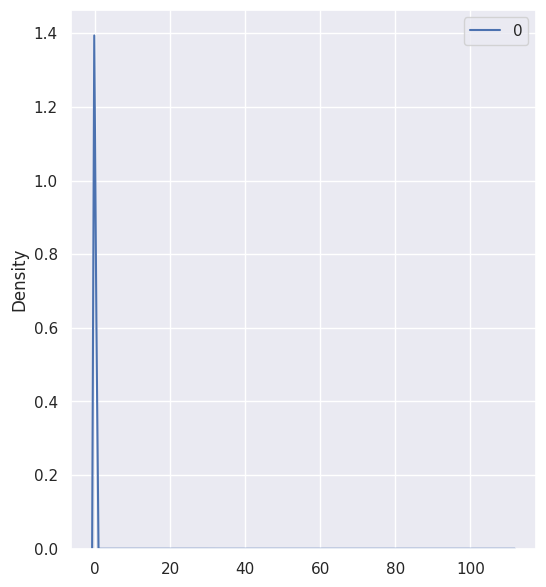

In [ ]:
scaler.fit(y)
scaled_y = scaler.transform(y)
sns.kdeplot(data = scaled_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.25)

# **Model 1: RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
X_train

array([[-0.59583386,  0.3178446 ,  0.0120894 , -0.64874311],
       [ 0.28403007,  1.71003617,  1.09769542,  1.22172209],
       [-0.68182057, -1.34182521, -1.51926214, -0.29415255],
       ...,
       [ 1.37986061,  1.15289859,  1.16839162,  0.16681518],
       [ 0.44000595,  0.08168089,  0.32602845, -0.51577165],
       [-0.59783355,  0.8462772 ,  0.55968537, -1.00333367]])

In [ ]:
y_test

array([[-0.32851145],
       [-0.36072245],
       [ 0.01983718],
       ...,
       [-0.04036434],
       [-0.15889605],
       [ 0.3354572 ]])

In [ ]:
#Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomised Search CV
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose = 2, random_state = 42, n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  57.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  56.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.8min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


**Predictions and GOoodness of fit**


In [ ]:
predictions = rf.random.predict(X_test)

In [ ]:
predictions

In [ ]:
sns.distplot(y_test, predictions)

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

# **Model 2: Custom GBNN**

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
from kerastuner import HyperModel, RandomSearch
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Defining a custom HyperModel class
class MyHyperModel(HyperModel):
  def build(self,hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_dim=input_dim))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
hypermodel = MyHyperModel()

In [ ]:
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_directory',
    project_name='my_project'
)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

In [ ]:
best_model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_val, y_val))

In [ ]:
mse = best_model.evaluate(X_test, y_test)
print(mse)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
gbnn_model = XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    tree_method='gpu_hist',
    base_score=0.5,
    base_estimator=best_model
)

In [ ]:
gbnn_model.fit(X_train, y_train)

In [ ]:
y_pred = gbnn_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(best_model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
best_model.summary()